In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam


In [6]:
dataset = pd.read_csv("data.csv", index_col=0)
dataset['y'] = dataset['y'].apply(lambda x: 1 if x == 1 else 0)
X = dataset.drop(columns=['y'])
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


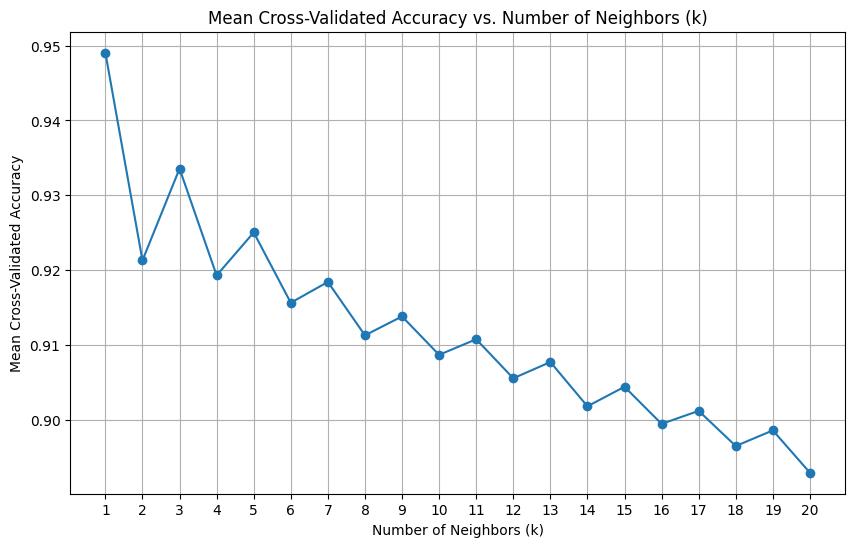

Best Parameters: {'n_neighbors': 1}
Best Accuracy: 0.9490434782608694


In [7]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 21)}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X, y)
results = grid_search.cv_results_
mean_scores = results['mean_test_score']
params = results['params']
ks = [param['n_neighbors'] for param in params]
plt.figure(figsize=(10, 6))
plt.plot(ks, mean_scores, marker='o', linestyle='-')
plt.title('Mean Cross-Validated Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(ks)
plt.grid(True)
plt.show()

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Training Accuracy: 0.9777173913043479
Testing Accuracy: 0.961304347826087
Training F1 Score: 0.9420740322124894
Testing F1 Score: 0.9003359462486002


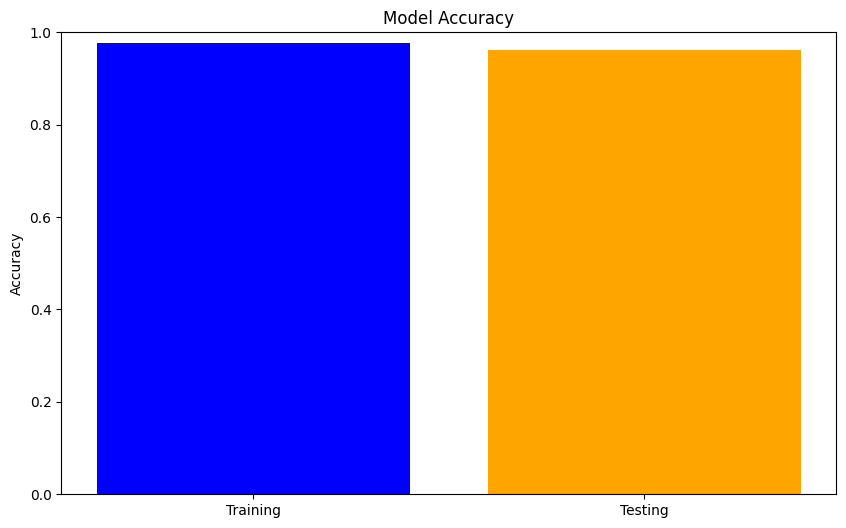

In [8]:
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
dataset = pd.read_csv("data.csv", index_col=0)
dataset['y'] = dataset['y'].apply(lambda x: 1 if x == 1 else 0)
X = dataset.drop(columns=['y'])
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=5)

# Fit and transform the data
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)
# Define and train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000,
                    alpha=0.0001, solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on training and testing sets
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Calculate F1 score for training and testing sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(['Training', 'Testing'], [train_accuracy,
        test_accuracy], color=['blue', 'orange'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

Training Accuracy: 1.0
Testing Accuracy: 0.9795652173913043


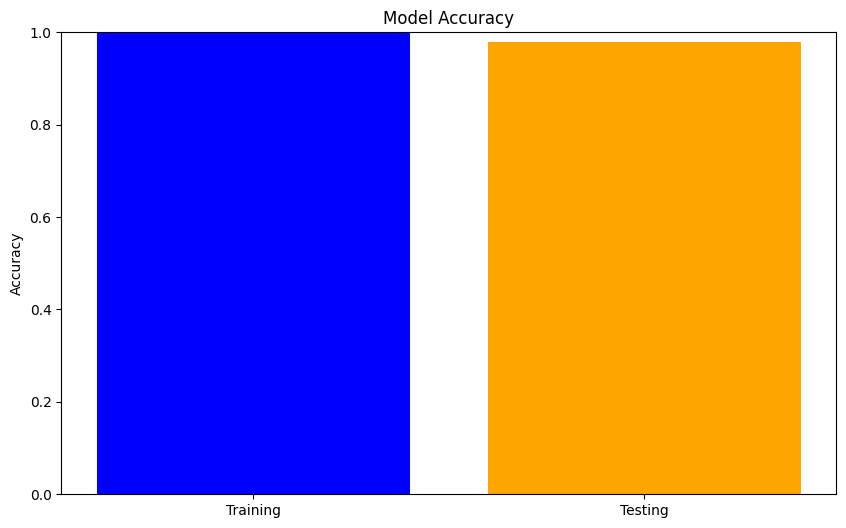

In [9]:
dataset = pd.read_csv("data.csv", index_col=0)
dataset['y'] = dataset['y'].apply(lambda x: 1 if x == 1 else 0)
X = dataset.drop(columns=['y'])
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)


X_test = scaler.transform(X_test)



# Define and train MLPClassifier


mlp_best = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=0.0001, solver='adam', random_state=42)


mlp_best.fit(X_train, y_train)



# Make predictions on training and testing sets


y_train_pred = mlp_best.predict(X_train)


y_test_pred = mlp_best.predict(X_test)



# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)



print("Training Accuracy:", train_accuracy)


print("Testing Accuracy:", test_accuracy)



# Plot accuracy


plt.figure(figsize=(10, 6))


plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['blue', 'orange'])


plt.title('Model Accuracy')


plt.ylabel('Accuracy')


plt.ylim(0, 1)


plt.show()

In [10]:
from sklearn.metrics import f1_score

# Calculate F1 score for training and testing sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

Training F1 Score: 1.0
Testing F1 Score: 0.948180815876516


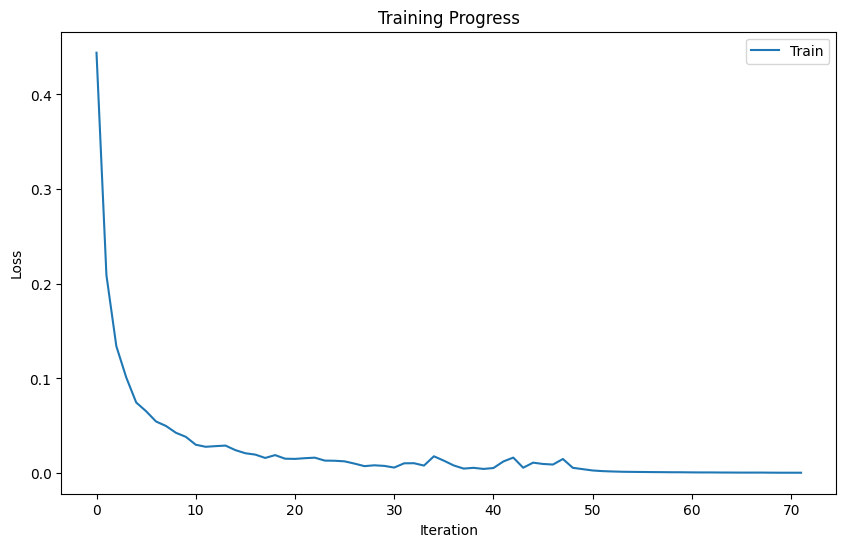

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(mlp_best.loss_curve_, label='Train')
plt.title('Training Progress')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
import pickle
file = 'model.pkl'
pickle.dump(mlp_best, open(file,'wb'))